In [172]:
import os, shutil, yaml, itertools, math, wandb, sys, json
import numpy as np
import importlib
import re, math
import cv2
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
import pycocotools.mask as cocomask
import skimage.io as io
import pylab
%matplotlib inline
import bitsandbytes as bnb
osp = os.path
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

import torch
nn = torch.nn
F = torch.nn.functional
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = True

import sprelnet
base_proj_dir = "/data/vision/polina/users/clintonw/code/mmdet"
base_job_dir = "/data/vision/polina/users/clintonw/code/mmdet/results"
mnist_grid_dir = "/data/vision/polina/scratch/clintonw/datasets/mnist_grid"

## Interactive

mnist.create_multi_MNIST_dataset()

pixels.create_pixel_dataset();

In [ ]:
from sprelnet import train

from sprelnet import util, losses, wab, visualize
from sprelnet.data import mnist, pixels
from sprelnet.networks.relations import get_relnet
from sprelnet.networks.unet import get_unet
from sprelnet.networks.adversarial import get_adv_sprelnet
from sprelnet.networks.contrastive import get_contra_net
from sprelnet.networks.patch_net import get_patch_net

In [ ]:
ds = util.load_binary_file(pixel_ds_path)
ds["datapoint loader"]= lambda dp: (dp.sum(0, keepdim=True).cuda(), (dp != 0).float().cuda())
util.save_binary_file(data=ds, path=pixel_ds_path)

In [ ]:
import importlib
importlib.reload(mnist)

### dataset

In [12]:
coco_annot_json_dir = "/data/vision/polina/scratch/clintonw/datasets/coco/annotations"
coco_annot_json_path = os.path.join(coco_annot_json_dir, "instances_val2017.json")
with open(coco_annot_json_path, "r") as f:
    out = json.load(f)

In [2]:
import os, wandb, shutil
import numpy as np
import torch
import torchvision.datasets
from pycocotools.coco import COCO
import pycocotools.mask as cocomask

from sprelnet import util

ds_folder = '/data/vision/polina/scratch/clintonw/datasets'
mnist_grid_dir = "/data/vision/polina/scratch/clintonw/datasets/mnist_grid"

In [3]:
from sprelnet.data.mnist import *

In [5]:
from sprelnet.data import mnist

In [21]:
digits_per_dim=(5,5)
N_train=90
N_val=10
train_mnist, test_mnist = get_mnist()
base_images = torch.cat([train_mnist[0], test_mnist[0]], 0)
labels = torch.cat([train_mnist[1], test_mnist[1]], 0)
category_names = get_multi_mnist_legend().keys()
n_digits = np.prod(digits_per_dim)

In [23]:
ann_id=0
img_dir=os.path.join(mnist_grid_dir, "train")

In [14]:
mnist.create_mnist_grid_coco_dataset(N_train=4000, N_val=1000)

In [8]:
annFile = os.path.join(mnist_grid_dir, "train/annotation_coco.json")
coco = COCO(annFile)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [ ]:
imgIds = [2]
img = coco.loadImgs(imgIds)[0]

# load and display image
I = io.imread('%s/%s/%s'%(mnist_grid_dir,"train",img['file_name']), as_gray=True)
# I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I, cmap="gray")
plt.show()

In [ ]:
# load and display instance annotations
plt.imshow(I, cmap="gray"); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)
# for i in anns:
#     [x,y,w,h] = i['bbox']
#     cv2.rectangle(I, (int(x), int(y)), (int(x+w), int(y+h)), 1., 1);
#     #cv2.imshow(I)
# plt.imshow(I, cmap="gray"); plt.axis('off')

In [ ]:
annType = ['segm','bbox','keypoints']
annType = annType[1]      #specify type here
prefix = 'person_keypoints' if annType=='keypoints' else 'instances'
print('Running demo for *%s* results.'%(annType))

In [ ]:
#initialize COCO ground truth api
dataDir='/data/vision/polina/scratch/clintonw/datasets/coco'
dataType='val2017'
annFile = '%s/annotations/%s_%s.json'%(dataDir,prefix,dataType)
coco=cocoGt=COCO(annFile)

In [ ]:
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

In [91]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
imgIds = coco.getImgIds(catIds=catIds );
imgIds = coco.getImgIds(imgIds = [324158])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

In [8]:
code_dir = "/data/vision/polina/users/clintonw/code"
mmdet_dir = f"{code_dir}/mmdet"

In [ ]:
job_name = "yolov3_d53_fp16_mstrain-608_273e_coco"
model_type = "yolo"
cfg = f"configs/{model_type}/{job_name}.py"
work_dir = f"/data/vision/polina/scratch/{job_name}"
print(f"sh slurm_train.sh gpu {job_name} {cfg} {work_dir}")

In [ ]:
model_type = "yolo"
job_name = "yolov3_d53_fp16_mstrain-608_273e_coco"
chckpoint = f"{code_dir}/mmdet/checkpoints/yolov3_d53_fp16_mstrain-608_273e_coco_20210517_213542-4bc34944.pth"

cfg = f"configs/{model_type}/{job_name}.py"
res_path = f"results/{job_name}.pkl"
print(f"sh slurm_test.sh gpu {job_name} {cfg} {chckpoint} --out {res_path}")

In [27]:
model_type = "faster_rcnn"
job_name = "faster_rcnn_r50_fpn_mstrain_3x_coco"
chckpoint = f"{code_dir}/mmdet/checkpoints/faster_rcnn_r50_fpn_mstrain_3x_coco_20210524_110822-e10bd31c.pth"

cfg = f"configs/{model_type}/{job_name}.py"
res_path = f"results/{job_name}.pkl"
print(f"./tools/slurm_test.sh gpu {job_name} {cfg} {chckpoint} --out {res_path}")

./tools/slurm_test.sh gpu faster_rcnn_r50_fpn_mstrain_3x_coco configs/faster_rcnn/faster_rcnn_r50_fpn_mstrain_3x_coco.py /data/vision/polina/users/clintonw/code/mmdet/checkpoints/faster_rcnn_r50_fpn_mstrain_3x_coco_20210524_110822-e10bd31c.pth --out results/faster_rcnn_r50_fpn_mstrain_3x_coco.pkl


In [9]:
import dill as pickle
import os

In [16]:
with open(os.path.join(mmdet_dir, res_path), "rb") as f:
    out = pickle.load(f)

In [23]:
len(out)

5000

In [22]:
len(out[0])

80

In [30]:
batch1 = out[0]

In [ ]:
GPUS=16 ./tools/slurm_test.sh gpu mask_r50_1x_test configs/mask_rcnn_r50_fpn_1x_coco.py /nfs/xxxx/mask_rcnn_r50_fpn_1x

### sprelnet

In [ ]:
class cmd_args:
    job_id = "van_pix"
    config_path = f"/data/vision/polina/users/clintonw/code/sprelnet/configs/{job_id}.yaml"
    p = f"{util.base_job_dir}/{job_id}"
    if not os.path.exists(p):
        os.makedirs(p)
with open(cmd_args.config_path, 'r') as stream:
    args = yaml.safe_load(stream)

run, args = train.prep_run(cmd_args, args)

if args["data loading"]["dataset"] == "MNIST grid":
    dataset = mnist.get_multi_mnist(run=run)
elif args["data loading"]["dataset"] == "pixels":
    dataset = pixels.get_pixel_dataset(run=run)
else:
    raise NotImplementedError("bad dataset")

dataloaders = util.get_dataloaders(dataset, batch_size=args["data loading"]["batch size"])

In [ ]:
if args["network"]["type"] in ["adversarial", "vanilla"]:
    get_net_fxn = get_adv_sprelnet
    train_fxn = train.train_main_relnet
elif args["network"]["type"] == "unet":
    get_net_fxn = get_unet
    train_fxn = train.train_unet
elif args["network"]["type"] == "relnet only":
    get_net_fxn = get_relnet
    train_fxn = train.train_relnet
elif args["network"]["type"] == "contrastive":
    get_net_fxn = get_contra_net
    train_fxn = train.train_contranet
elif args["network"]["type"] == "iterative with attention over patch proposals":
    get_net_fxn = get_patch_net
    train_fxn = train.train_patchnet
else:
    raise NotImplementedError("bad network type")

network = get_net_fxn(net_HPs=args["network"], dataset=dataset)
paths=args["paths"]
loss_settings=args["loss"]
optimizer_settings=args["optimizer"]

In [ ]:
model_artifact = wandb.Artifact("sprelnet", type="model", description="segmenter with spatial relations")
model_artifact.add_dir(paths["model weights directory"])

wab.define_metrics(["test loss", "test dice"])

G = network.G
relnet = network.relnet
if network.type == "adversarial":
    D = network.D_XY
loss_weights = loss_settings["weights"]

# setup dataloaders
batch_size = dataloaders["train"].batch_size
N_train = len(dataset["train datapoints"])
N_test = len(dataset["test datapoints"])
bce_loss = losses.get_bce_loss(dataset)

G_optim = bnb.optim.Adam8bit(G.parameters(), lr=float(optimizer_settings["G learning rate"]))
if network.type == "adversarial":
    DR_optim = bnb.optim.Adam8bit(itertools.chain(relnet.parameters(), D.parameters()),
        lr=float(optimizer_settings["D learning rate"]))
else:
    DR_optim = bnb.optim.Adam8bit(relnet.parameters(), lr=float(optimizer_settings["relnet learning rate"]))


for epoch in range(1, optimizer_settings["epochs"]+1):
    pxy_true_sum, pxy_fake_sum, rel_true_sum, rel_fake_sum, seg_loss_sum = 0,0, 0,0, 0
    n_batches = math.ceil(N_train/batch_size)
    rel_weight = losses.determine_loss_weight("relation score", epoch=epoch, loss_settings=loss_settings)

    for batch in dataloaders["train"]:
        X,Y_gt = batch
        Y_logits = G(X)
        seg_loss = bce_loss(Y_logits, Y_gt)

        Y_hat = torch.sigmoid(Y_logits)
        if network.type == "adversarial":
            p_xy_fake = D(X, Y_hat).mean()
            pxy_fake_sum += p_xy_fake.item()

        rel_fake = relnet(Y_hat).mean()
        rel_fake_sum += rel_fake.item()
        seg_loss_sum += seg_loss.item()

        if network.type == "adversarial":
            G_loss = seg_loss * loss_weights["cross entropy"] + rel_fake * rel_weight - p_xy_fake
        else:
            G_loss = seg_loss * loss_weights["cross entropy"] + rel_fake * rel_weight

        G_optim.zero_grad()
        G_loss.backward(retain_graph=True)
        G_optim.step()




        if network.type == "adversarial":
            p_xy_true = D(X, Y_gt).mean()
            p_xy_fake = D(X, Y_hat.detach()).mean()
            pxy_true_sum += p_xy_true.item()
        rel_true = relnet(Y_gt).mean() * loss_weights["relation score"]
        rel_true_sum += rel_true.item()

        if network.type == "adversarial":
            DR_loss = p_xy_fake - p_xy_true + rel_true
        else:
            DR_loss = rel_true

        DR_optim.zero_grad()
        DR_loss.backward()
        sparse_reg, smooth_reg = losses.get_multiscale_kernel_regs(relnet, loss_weights)
        sparse_reg.backward()
        smooth_reg.backward()
        util.mask_identity_grad_in_kernel(relnet)
        DR_optim.step()
        break
    break

## Slurm

In [ ]:
import mmdet.utils.job_mgmt as omm_util
importlib.reload(omm_util)

### COCO

In [ ]:
https://gist.github.com/mkocabas/a6177fc00315403d31572e17700d7fd9
cd images
wget http://images.cocodataset.org/zips/train2017.zip
wget http://images.cocodataset.org/zips/val2017.zip
wget http://images.cocodataset.org/zips/test2017.zip
wget http://images.cocodataset.org/zips/unlabeled2017.zip
unzip -n val2017.zip
cd ../
wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
wget http://images.cocodataset.org/annotations/stuff_annotations_trainval2017.zip
wget http://images.cocodataset.org/annotations/image_info_test2017.zip
wget http://images.cocodataset.org/annotations/image_info_unlabeled2017.zip
unzip

### New heading

In [ ]:
job = "mnist_grid_02_test"
logs, errs = omm_util.print_job_log(job), omm_util.print_job_err(job)
logs, errs

In [121]:
job_name = "mnist_grid_02_test"

path = f"{base_job_dir}/{job_name}/imgs"
if not osp.exists(path):
    raise ValueError(f"{path} does not exist")
img_paths = glob.glob(path+"/*")

In [ ]:
img_paths

In [ ]:
omm_util.show_sample_result(job)

In [ ]:
logs[-20:]

In [114]:
metrics = ["bbox_mAP", "bbox_mAP_50", "bbox_mAP_75"]
jobs = ["faster_rcnn_20200130-047c8118", "mnist_grid_01"]#, "mnist_grid_02"]
table = omm_util.collate_metrics_for_jobs(metrics, jobs)
table

In [ ]:
python mmdet/demo/simple_demo.py

In [ ]:
sh clintonw_train.sh frc_mn ~/code/mmdet/configs/mnist_grid/faster_rcnn_r50_fpn_1x_mnist.py
sh clintonw_train.sh frc_mn2 ~/code/mmdet/configs/mnist_grid/faster_rcnn_r50_fpn_1x_mnist.py
sh clintonw_train.sh frc_coco ~/code/mmdet/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py
sh clintonw_train.sh frc_coc2 ~/code/mmdet/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py

sh clintonw_test.sh mnist_grid faster_rcnn_r50_fpn_1x_mnist 01
sh clintonw_test.sh mnist_grid faster_rcnn_r50_fpn_1x_mnist 02
sh clintonw_test.sh faster_rcnn faster_rcnn_r50_fpn_1x_coco 20200130-047c8118

cp frc_mn/latest.pth ~/code/mmdet/checkpoints/faster_rcnn_r50_fpn_1x_mnist_01.pth
cp frc_mn2/latest.pth ~/code/mmdet/checkpoints/faster_rcnn_r50_fpn_1x_mnist_02.pth

In [ ]:
sh bbox_results.sh mnist_grid faster_rcnn_r50_fpn_1x_mnist 02 \
    /data/vision/polina/scratch/clintonw/datasets/mnist_grid/val/annotation_coco.json

In [ ]:
sh slurm_analyze.sh mnist_grid faster_rcnn_r50_fpn_1x_mnist 02
sh slurm_analyze.sh faster_rcnn faster_rcnn_r50_fpn_1x_coco 20200130-047c8118

In [218]:
train_job = "frc_mn2"
logpath = glob.glob(f"{base_job_dir}/{train_job}/*.log.json")[0]
metrics = "bbox_mAP" #loss_cls"
outpath = osp.join(osp.dirname(logpath), f"{metrics}.pdf")
print(f"""python tools/analysis_tools/analyze_logs.py plot_curve \
{logpath} --keys {metrics} --legend {metrics} --out {outpath}""")

python tools/analysis_tools/analyze_logs.py plot_curve /data/vision/polina/users/clintonw/code/mmdet/results/frc_mn2/20211127_121842.log.json --keys loss_cls --legend loss_cls --out /data/vision/polina/users/clintonw/code/mmdet/results/frc_mn2/loss_cls.pdf


In [155]:
#img_paths = glob.glob(base_job_dir+"/faster_rcnn_20200130-047c8118_test/imgs/good/*")
img_paths = glob.glob(base_job_dir+"/mnist_grid_02_test/imgs/good/*")

In [201]:
importlib.reload(sprelnet.data.mnist)

<module 'sprelnet.data.mnist' from '/data/vision/polina/users/clintonw/code/sprelnet/sprelnet/data/mnist.py'>

loading annotations into memory...
Done (t=0.10s)
creating index...
index created!


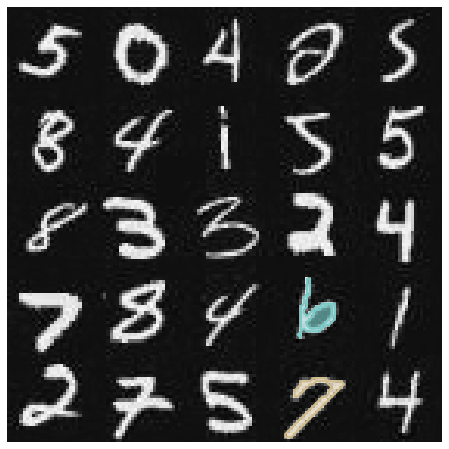

In [202]:
img_path = img_paths[1]
test_img = plt.imread(img_path)
coco_id = osp.basename(img_path)[:-8]
raw_img, anns, coco = sprelnet.data.mnist.fetch_mnist_grid_img(coco_id, with_anns=True)
plt.imshow(raw_img, cmap="gray"); plt.axis('off')
coco.showAnns(anns)

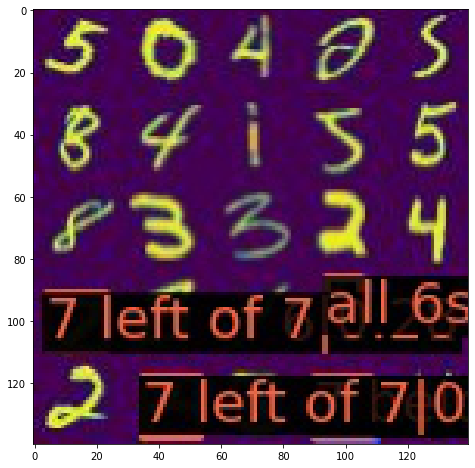

In [203]:
plt.imshow(test_img)

In [ ]:
python tools/analysis_tools/coco_error_analysis.py \
       results.bbox.json \
       results \
       --ann=data/coco/annotations/instances_val2017.json \


In [ ]:
path = "/data/vision/polina/users/clintonw/code/mmdet/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_mnist.py"

In [ ]:
sh script_train.sh adv_mni
sh script_train.sh patch_mni
sh script_train.sh unet_mni
sh script_train.sh van_pix
sh script_train.sh van_mni
sh script_train.sh rel_dbug

In [ ]:
importlib.reload(util);

In [ ]:
util.end_slurm_jobs(["van_mni"])

In [ ]:
#util.rename_job("rel_mni", "rel_mni_01")
util.delete_job_outputs("van_pix")

In [ ]:
util.print_job_log("unet_mni")

In [ ]:
util.print_job_log("van_pix")

In [ ]:
util.print_job_log("patch_mni")

In [ ]:
util.print_job_log("rel_dbug")

In [ ]:
wab.clear_failed_runs()